# Introduction

### 1.Data Exploration
### 2.Feature Selection
### 3.Decision Tree Model
### 4.SVM
### 5.Ensemble Model
### 6.Comparison between those models

# Part 1: Data Exploration

In [40]:
import numpy as np
import pandas as pd

In [48]:
data=pd.read_csv('device_failure.csv',encoding = "ISO-8859-1")

In [49]:
print(data.shape)

(124494, 12)


In [50]:
##change "failure" to category data, date to datetime

In [54]:
data['failure']=data['failure'].astype('category')
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d')

In [55]:
data.dtypes

date          datetime64[ns]
device                object
failure             category
attribute1             int64
attribute2             int64
attribute3             int64
attribute4             int64
attribute5             int64
attribute6             int64
attribute7             int64
attribute8             int64
attribute9             int64
dtype: object

In [56]:
data.describe(include="all")

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494,124494,124494.0,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
unique,304,1169,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-03 00:00:00,S1F0H6JG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1163,304,124388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-11-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,NaN,NaN,NaN,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000


In [ ]:
#check if there is any missing value in the data

In [57]:
data.isnull().T.any().T.sum()

0

There is no missing value in the dataset. We can move forward and do some data explorations 

In [63]:
data['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

Since failure takes very small percentage in the whole dataset. Based on the business logic, I am thinking that the distribution of attribute 1-9 might be very different between failure and non-failure.

In [100]:
def get_column_types(dataframe):
    numeric_cols = dataframe.select_dtypes([np.number,np.float64]).columns.values
    cat_cols = dataframe.select_dtypes([np.object]).columns.values
    date_cols = dataframe.select_dtypes([np.datetime64]).columns.values
    print("In total there's %d columns" % dataframe.shape[1] )
    print('These %d columns are numeric: %s'% (len(numeric_cols),numeric_cols))
    print('These %d columns are catgorical: %s'% (len(cat_cols),cat_cols))
    print('These %d columns are timestampe: %s'% (len(date_cols),date_cols))
    return numeric_cols,cat_cols,date_cols

num_cols,cat_cols,date_cols = get_column_types(data)

In total there's 12 columns
These 9 columns are numeric: ['attribute1' 'attribute2' 'attribute3' 'attribute4' 'attribute5'
 'attribute6' 'attribute7' 'attribute8' 'attribute9']
These 1 columns are catgorical: ['device']
These 1 columns are timestampe: ['date']


In [67]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/zhumary/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


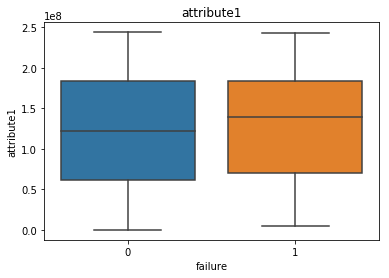

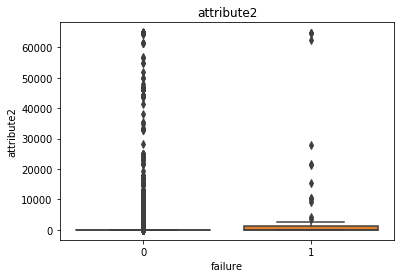

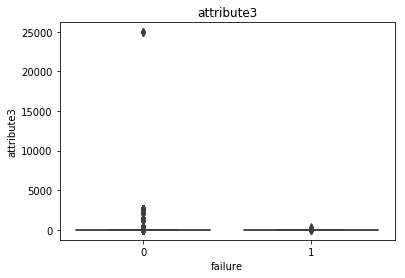

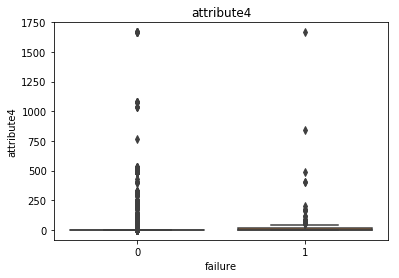

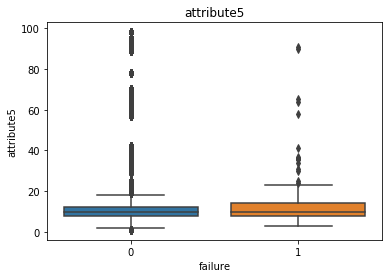

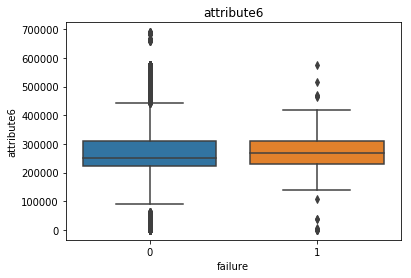

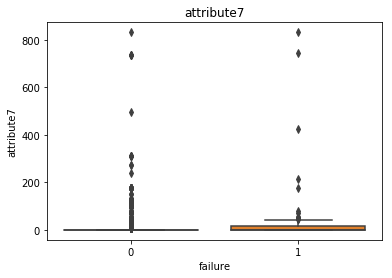

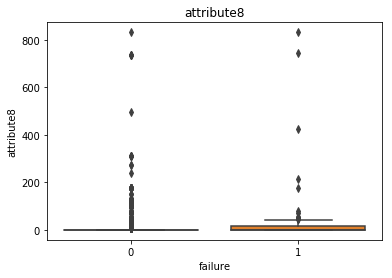

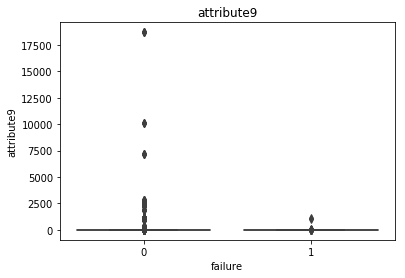

In [141]:
for i in data.columns[3:]:
    plt.figure()
    sns.boxplot(x="failure", y=i, data=data).set_title(i)

From above boxplot, the distbution and outliers of attribute 2,3,4,5,6,9 in "failure serivce" are closer to the mean value of each attribute. But we can not tell too much diffierence. So we are going to use feature selection to see the importance of each attribute.

## Part2 Decision Tree and Random Forest

In [ ]:
## split data to train and test